In [3]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv

In [4]:
load_dotenv()

model = ChatGoogleGenerativeAI(model="gemini-2.5-flash-lite")

In [5]:
class BlogState(TypedDict):
    title: str
    outline: str
    content: str

In [6]:
def create_outline(state: BlogState) -> BlogState :
    title = state['title']

    prompt = f"Generate the detailed outline for blog on the topic ${title}"

    outline = model.invoke(prompt).content
    state['outline'] = outline

    return state

In [7]:
def create_blog(state: BlogState) -> BlogState:
    title = state['title']
    outline = state['outline']

    prompt = f"Write the detailed blog on the title - {title} using the following outline \n {outline}"

    content = model.invoke(prompt).content

    state['content'] = content

    return state

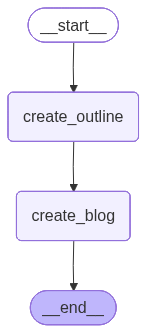

In [8]:
graph = StateGraph(BlogState)

# node
graph.add_node('create_outline' , create_outline)
graph.add_node('create_blog', create_blog)

# edges
graph.add_edge(START , 'create_outline')
graph.add_edge('create_outline' , 'create_blog')
graph.add_edge('create_blog' , END)

workflow = graph.compile()
workflow

In [9]:
initial_state = {"title" : "Rise of vikings"}
final_state = workflow.invoke(initial_state)
print(final_state)

{'title': 'Rise of vikings', 'outline': '## The Rise of the Vikings: From Seafarers to Empire Builders\n\n**Blog Title Options:**\n\n* The Rise of the Vikings: A Journey from Raiders to Rulers\n* Beyond the Axe: Unpacking the Astonishing Rise of the Viking Age\n* The Viking Surge: How a Seafaring People Conquered the World\n* From Fjords to Fortresses: The Epic Rise of the Vikings\n\n**Target Audience:** History enthusiasts, students, general readers interested in the Viking Age, those curious about early European history.\n\n**Blog Post Goal:** To provide a comprehensive and engaging overview of the factors that led to the Viking Age, their expansion, and their lasting impact.\n\n---\n\n**I. Introduction: The Dawn of a New Era (Approx. 300-400 words)**\n\n*   **Hook:** Start with a vivid image or anecdote that captures the essence of Viking power and mystique (e.g., a longship on a stormy sea, a raid on Lindisfarne, a powerful chieftain).\n*   **Introduce the Viking Age:** Briefly def

In [10]:
print(final_state['outline'])

## The Rise of the Vikings: From Seafarers to Empire Builders

**Blog Title Options:**

* The Rise of the Vikings: A Journey from Raiders to Rulers
* Beyond the Axe: Unpacking the Astonishing Rise of the Viking Age
* The Viking Surge: How a Seafaring People Conquered the World
* From Fjords to Fortresses: The Epic Rise of the Vikings

**Target Audience:** History enthusiasts, students, general readers interested in the Viking Age, those curious about early European history.

**Blog Post Goal:** To provide a comprehensive and engaging overview of the factors that led to the Viking Age, their expansion, and their lasting impact.

---

**I. Introduction: The Dawn of a New Era (Approx. 300-400 words)**

*   **Hook:** Start with a vivid image or anecdote that captures the essence of Viking power and mystique (e.g., a longship on a stormy sea, a raid on Lindisfarne, a powerful chieftain).
*   **Introduce the Viking Age:** Briefly define the period (roughly late 8th to mid-11th century) and i

In [11]:
print(final_state['content'])

## The Rise of the Vikings: From Seafarers to Empire Builders

The wind whips across a grey, unforgiving sea, carrying the scent of salt and the promise of distant shores. A sleek, dragon-headed longship, its sail taut, cuts through the waves. Within its sturdy hull, a crew of hardened warriors, their eyes fixed on the horizon, are more than just a raiding party; they are the vanguard of a phenomenon that would send shockwaves across Europe and beyond. This is the image that often springs to mind when we think of the Vikings, but the reality of their rise is far more intricate, a tapestry woven from environmental pressures, societal shifts, technological prowess, and an insatiable drive for opportunity.

The Viking Age, a period roughly spanning from the late 8th to the mid-11th century, was not a sudden eruption of violence, but rather the culmination of centuries of development in the Scandinavian lands. To understand the "Viking surge," we must look beyond the sensationalized image 